# Week 3 - Convolutional neural networks

- Add stuff about the intermittent outputs of the conv layers
- REmember eto include both max **and** average pooling
 
## Overview
*(p. 287 - 321 in Bishop)*


CNN’s are a class of Neural networks, typically used in:
1. Image analysis: Since the amount of parameters they use is effectively invariant in
regards to the size of the image. Moreoever because they can learn to do feature
extraction much the same way regular convolution does.
2. Time signal analysis: Again, since their number of parameters do not scale with the
length of the observed signal. Also again since they can learn to mimic a lot of the
convolutions (which is essentially filtering) that have proven themselves useful in
the past

Like every other neural network class out there, there are a million-and-one specific
methods and ideas to improve their performance, of all these, these exercises only ex-
plore pooling. Moreoever, there is a billion-and-two different specific architectures that
are useful in specific or different cases. Of these, we will only considerVGG16.
Even so, with these fundamentals in mind, you should be able to at least understand
what it is most other implementations of these neural networks do.



**The theoretical exercises are divided into different parts, you do not have to
do all in-order, you can jump between them as much as you like. Like always,
be sure to ask plenty of ’stupid’ questions; CNN’s probably more than any
other subject, has many ”I really should understand this, but I don’t, there-
fore I must be dumb”-moments, so don’t sweat it if it seems trivial, it probably
isn’t.**

Questions marked with * are ”bonus” questions only vaguely related to the
core subject, and you will not be expected to know them in an exam setting

## 1 - Convolutional Layers

### Exercise 1.1 (ch. 10.2.5)

Consider one convolution kernel for a CNN as shown in the image below with the given parameters:
- Size: $3 \times 3$
- Padding (zero-padded): $1$
- Stride: $1$
- Input channels: $3$

****1:** How many (learnable) parameters does this kernel have in a CNN?**

$\dots$


****2:** In general, how many parameters does an 𝑛 × 𝑛 kernel with 𝑝 padding and 𝑠 stridehave?** 

$\dots$


### Exercise 1.2

Say you now have a convolutional layer with the following params:

- Kernel size: $n \times n$
- Input channels: $d$
- Output channels: $k$


**1: How many learnable parameters does this whole convolutional layer have?**

$\dots$


**2: Check your manual calculation against that of the torch implementation below**

In [2]:
import torch.nn as nn

# Parameters for a simple convolutional layer
in_channels = 3
out_channels = 128
kernel_size = (2,3) # Does not have to be a tuple, if int, will be converted to a square kernel
stride = 1
padding = 0
bias = True

# Define conv layer and sum number of parameters
conv_layer = nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size, stride=stride, padding=padding, bias=True)
num_params = sum(p.numel() for p in conv_layer.parameters())

# Calculate number of parameters manually
num_params_manual = ((in_channels*kernel_size[0]*kernel_size[1] + bias)*out_channels) # ANSWER: (d * m * n + 1) * k

print(f"Torch thinks there are {num_params} parameters in the layer layer \nCompared to {num_params_manual} calculated manually")

Torch thinks there are 2432 parameters in the layer layer 
Compared to 2432 calculated manually


### Exercise 1.3

Given a convolutional layer with the following parameters:
- Size: $n \times n$
- Padding: $p$
- Stride: $s$
- Input channels: $d$
- Output channels: $k$


**1. What is the dimensionality of the output? (Do not forget to include the number of
channels)**

$\dots$


**2. Likewise, what is the dimensionality after a pooling layer with the same parameters ?**

$\dots$

**3. Check your answer against the torch code below**


In [20]:
import PIL.Image
import torchvision.transforms.functional

# Once more, Parameters for a simple convolutional layer
in_channels = 3
out_channels = 128
kernel_size = (2,3) # Does not have to be a tuple, if int, will be converted to a square kernel
stride = 1
padding = 0
bias = True

# Define conv layer and sum number of parameters
conv_layer = nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size, stride=stride, padding=padding, bias=True)

# Define two dimensional max pooling layer
max_pool_layer = nn.MaxPool2d(kernel_size=kernel_size, stride=stride, padding=padding)

# Load image and convert to tensor
a_cool_image = PIL.Image.open("a_cool_image.jpg").convert("RGB")
# Unsqueeze to add batch dimension (because torch is nasty like that and expects a batch dimension)
a_cool_image_tensor = torchvision.transforms.functional.to_tensor(a_cool_image).unsqueeze(0)

print(f"Image shape before convolution: {a_cool_image_tensor.shape}")

# Apply convolution and max pooling
convolved_image = conv_layer(a_cool_image_tensor)
pooled_image = max_pool_layer(a_cool_image_tensor)

print(f"Image shape after convolution: {convolved_image.shape}")
print(f"Image shape after max pooling: {pooled_image.shape}")

Image shape before convolution: torch.Size([1, 3, 56, 56])
Image shape after convolution: torch.Size([1, 128, 55, 54])
Image shape after max pooling: torch.Size([1, 3, 55, 54])


### Exercise 1.4

*It should be clear now, that each channel in the output image, corresponds to one kernel
being run across all channels in the input image. Therefore with $k$ output channels, we
have to train $k$ kernels, each with $m \times n \times d + 1$ parameters.*

**1. Discuss (and write down) the benefits of having a larger number of output channels
compared to input channels.**

$\dots$

**2. Increasing the number of output channels in one layer obviously leads to more ker-
nels (and therefore more parameters), but how does this increased number of output
channels affect the kernels in subsequent layers in a neural network?**

$\dots$


### Exercise 1.5

*If you read the torch documentation of Conv2d: [Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html), you won’t find anywhere that
it flips the kernel as is otherwise required to go from cross-correlation to convolution.*


**1. Explain how PyTorch, a respectable deep learning framework, can get away with *not*
flipping the kernel**

$\dots$


### **Exercise 1.6

*As mentioned, one reason CNN’s are used for image processing, is because they don’t
explode in parameter complexity as the input image increases in size. Here we will
bastardize the big-O notation from Algorithms and Data structures to denote how the
number of parameters in a nerual network increases as a function of relevant hyperpa-
rameters.*

**1. In the aforementioned big-O, how does the number of parameters in a fully connected,
feedforward neural network (FFN) grow as a function of image size (assume multiple
input channels)?**

$\dots$

**2. Again in the Big-O notation, how does the number of parameters in a CNN grow as a
function of image size and other relevant layer hyperparameters?**

$\dots$

## Coding CNN's

*Theres a **bunch** of boilerplate that goes into every NN implementation in Python. Our advice, is to understand and solve the exercises given first, and then look into this boilerplate. A lot of people and guides tell you to simply ignore this boilerplate code... **But it will haunt you***

In [22]:
import torch
from torch import nn
import torchvision.datasets as datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from torchsummary import summary # courtesy of https://stackoverflow.com/questions/55875279/how-to-get-an-output-dimension-for-each-layer-of-the-neural-network-in-pytorch

# Check if you have cuda available, and use if you do
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cuda


In [117]:
# Load a dataset, change 'dataset' to 'cifar10' if you want to use CIFAR-10 instead

dataset = 'cifar10'

# TODO: PERHAPS USE THIS, PERHAPS NOT
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

if dataset == 'cifar10':
    train_set = datasets.CIFAR10(root='./data', train=True, download=True, transform=ToTensor())
    test_set = datasets.CIFAR10(root='./data', train=False, download=True, transform=ToTensor())

    # Purely for our convenience - Mapping from cifar labels to human readable classes
    cifar10_classes = {
        0: 'airplane',
        1: 'automobile',
        2: 'bird',
        3: 'cat',
        4: 'deer',
        5: 'dog',
        6: 'frog',
        7: 'horse',
        8: 'ship',
        9: 'truck'
    }

elif dataset == 'mnist':
    train_set = datasets.MNIST(root='./data', train=True, download=True, transform=ToTensor())
    test_set = datasets.MNIST(root='./data', train=False, download=True, transform=ToTensor())


# TODO: Print some stats of the dataset here...
print(f"There are {len(train_set)} examples in the training set")
print(f"There are {len(test_set)} examples in the test set \n")

print(f"Image shape is: {train_set[0][0].shape}, label example is {train_set[0][1]}")

Files already downloaded and verified
Files already downloaded and verified
There are 50000 examples in the training set
There are 10000 examples in the test set 

Image shape is: torch.Size([3, 32, 32]), label example is 6


In [118]:
# Define dataloaders - You don't *need* these per say, but they are very useful

# Collate function is called on each batch, the dataloader yields
# Here, we modify it to also cast the tensor to our desired device
from torch.utils.data.dataloader import default_collate
def collate_fn(batch):
    return tuple(x_.to(device) for x_ in default_collate(batch))

# Why don't we shuffle the test set? Because we don't need to.
train_dataloader = torch.utils.data.DataLoader(train_set, batch_size=16, shuffle=True, collate_fn=collate_fn)
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size=16, shuffle=False, collate_fn=None)

### Show a few examples from the dataset

*This is basically tradition at this point when making CNN introductions*

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


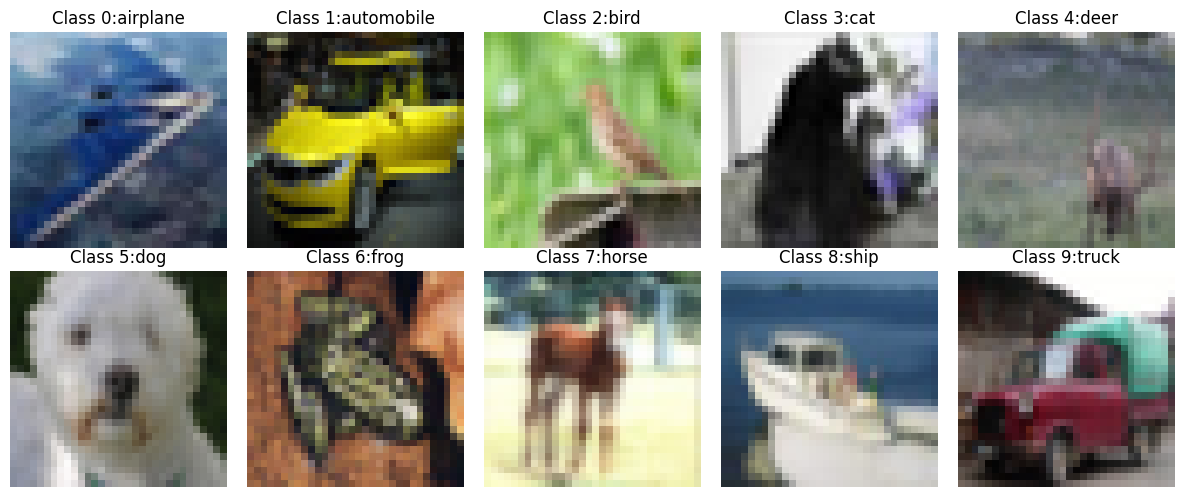

In [164]:
# Get indices of 10 different classes in the dataset, then get values
sampled_indices = [np.random.choice(np.where(np.array(train_set.targets) == i)[0]) for i in range(10)]
examples = train_set.data[sampled_indices]

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.flatten()

# Plot examples
for i in range(len(examples)):
    img = examples[i]
    if dataset == 'mnist':
        img = img.squeeze(0)  # Remove the channel dimension for MNIST
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f'Class {i}')
    else:
        axes[i].imshow(img)
        axes[i].set_title(f'Class {i}:{cifar10_classes[train_set.targets[sampled_indices[i]]]}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()


### Define a CNN class

Remember the following:

            
- Remember here, that the amount of parameters in a convolutional layerIs $(n * m * l + 1) * k$  
   - Where $n, m$ is the kernel size $(x, y)$, $l$ is the input channels, and $k$ is the $\text{output channels} + 1$, is beacuse of a bias term that is done for each input
  - Basically, $n * m * l$ corresponds to kernels mapping to values in another "image"
  - Each kernel has a bias term unique to it. Each kernel produces one "image", that are then stacked on top of each other, for a total of $k$ images.

- CONV2D does NOT flip the kernel!!!
  - It doesn't really mattter, since it is just learned anyways...
- [Better to maxpool first, max-pooling and monotonely increasing non-linearities commute. This means that MaxPool(Relu(x)) = Relu(MaxPool(x)) for any input](https://stackoverflow.com/questions/35543428/activation-function-after-pooling-layer-or-convolutional-layer
) 


In [144]:
class CNN(torch.nn.Module):
    def __init__(self, num_classes, in_channels=1, features_fore_linear=64*6*6, lr=0.001):
        super().__init__()

        # Define layers as a torch.nn.Sequential object
        # This is pretty nice, since we can just go layers(input) to get output
        # Rather than having a bunch of functions in the forward function
        self.layers = torch.nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=32, kernel_size=3, padding=1), # dim = in
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.MaxPool2d(kernel_size=2),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(in_features=features_fore_linear, out_features=600),
            nn.Linear(in_features=600, out_features=120),
            nn.Linear(in_features=120, out_features=num_classes)
        ).to(device)
                
        # Loss function and optimizer, as you know, Adam is meta
        self.criterion = nn.CrossEntropyLoss()
        self.optim = torch.optim.Adam(self.layers.parameters(), lr=lr)

    def forward(self, x):
        return self.layers(x)

    def train(self, train_dataloader, epochs=1, val_dataloader=None):
        
        # To hold accuracy during training and testing
        train_accs = []
        test_accs = []

        for epoch in range(epochs):
            
            epoch_acc = 0

            for inputs, targets in tqdm(train_dataloader):
                logits = self.forward(inputs)
                loss = self.criterion(logits, targets)
                loss.backward()

                self.optim.step()
                self.optim.zero_grad()

                # Not actually used for training, just for keeping track of accuracy
                epoch_acc += (torch.argmax(logits, dim=1) == targets).sum().item()

            train_accs.append(epoch_acc / len(train_dataloader.dataset))

            # If we have val dataloader, we can evaluate after each epoch
            if val_dataloader is not None:
                acc = self.eval(val_dataloader)
                test_accs.append(acc)
                print(f"Epoch {epoch} validation accuracy: {acc}")
        
        return train_accs, test_accs

    def eval(self, test_dataloader):
        
        total_acc = 0

        for input_batch, label_batch in test_dataloader:
            # Get predictions
            logits = self(input_batch)

            # Remember, outs are probabilities (so there's 10 for each input)
            # The classification the network wants to assign, must therefore be the probability with the larget value
            # We find that using argmax (dim=1, because dim=0 would be across batch dimension)
            classifications = torch.argmax(logits, dim=1)
            total_acc += (classifications == label_batch).sum().item()

        total_acc = total_acc / len(test_dataloader.dataset)

        return total_acc

### A small hack

*Normally, you have to ask ChatGPT, a friend or the dark Gods to find out what the dimensionality of the data is before the first linear layer (why has Torch not implemented this automatically????) Anyways, the below function solves that, while still being a bit cursed*

In [145]:
def get_dim_before_first_linear(layers, in_dim, in_channels, brain=False):
    """
    Assume square in dimensions, square kernels, cuz I'm lazy
    Also assume kernel numbers and channels match up, because that's trivial enough
    """

    current_dim = in_dim
    current_channels = in_channels
    for layer in layers:
        if isinstance(layer, nn.Conv2d) or isinstance(layer, nn.MaxPool2d):
            vals = {
                'kernel_size': layer.kernel_size if isinstance(layer.kernel_size, int) else layer.kernel_size[0],
                'stride': layer.stride if isinstance(layer.stride, int) else layer.stride[0],
                'padding': layer.padding if isinstance(layer.padding, int) else layer.padding[0],
                'dilation': layer.dilation if isinstance(layer.dilation, int) else layer.dilation[0]
            }
            current_dim = (current_dim + 2*vals['padding'] - vals['dilation']*(vals['kernel_size'])) // vals['stride'] + 1

        if isinstance(layer, nn.Conv2d):
            current_channels = layer.out_channels

        if isinstance(layer, nn.Linear):
            if brain:
                return current_dim, current_channels
            else:
                return current_dim * current_dim * current_channels
        
    raise ValueError("No linear layer found in layers! Why are you even asking me?")

### Training the CNN

*Putting it all together, we should be able to train the CNN*

100%|██████████| 3125/3125 [00:06<00:00, 510.28it/s]


Epoch 0 validation accuracy: 0.603


100%|██████████| 3125/3125 [00:06<00:00, 520.71it/s]


Epoch 1 validation accuracy: 0.6515


100%|██████████| 3125/3125 [00:05<00:00, 525.64it/s]


Epoch 2 validation accuracy: 0.6446


100%|██████████| 3125/3125 [00:06<00:00, 516.20it/s]


Epoch 3 validation accuracy: 0.6483


100%|██████████| 3125/3125 [00:05<00:00, 521.85it/s]


Epoch 4 validation accuracy: 0.6764


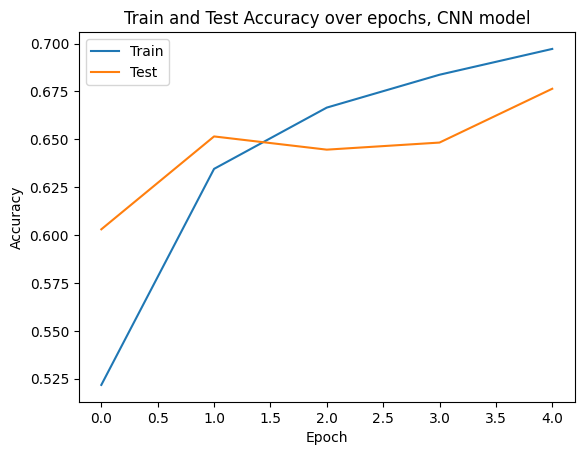

In [182]:
train_dataloader = torch.utils.data.DataLoader(train_set, batch_size=16, shuffle=True, collate_fn=collate_fn)
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size=16, shuffle=False, collate_fn=collate_fn)

in_channels = next(iter(train_dataloader))[0].shape[1]
in_width_height = next(iter(train_dataloader))[0].shape[-1]

# Make a dummy model to find out the size before the first linear layer
CNN_model = CNN(num_classes=10, in_channels=in_channels, lr=0.001)
feats_fore_linear = get_dim_before_first_linear(CNN_model.layers, in_width_height, in_channels, brain=False)

# Now make true model when we know how many features we have before the first linear layer
CNN_model = CNN(num_classes=10, in_channels=in_channels, features_fore_linear=feats_fore_linear, lr=0.001) 

train_epochs = 5
train_accs, test_accs = CNN_model.train(train_dataloader, epochs=train_epochs,  val_dataloader=test_dataloader)
# CNN_model.eval(test_dataloader)

# plot train and test accuracies
plt.plot(range(train_epochs), train_accs, label='Train')
plt.plot(range(train_epochs), test_accs, label='Test')


plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy over epochs, CNN model')
plt.legend()
plt.show()

# TODO: ADD QUESTION: WHY IS TRAIN ACCURACY MUCH LOWER THAN TEST ACCURACY FOR THE FIRST EPOCH?


# model.forward_checker(torch.zeros(16, 3, 64, 64))


## Defining a feedforward neural network (FFNN) class

*Here, we don't need to reinvent the wheel, so we just subclass from our existing CNN model to inherit all useful attributes*

In [149]:
class FFNN(CNN):
    def __init__(self, in_features, num_classes, lr=0.001):
        # We have to give it dummy values, otherwise intialization will not work
        super().__init__(num_classes=num_classes, in_channels=1, lr=0.001)
        
        self.num_classes = num_classes

        self.layers = nn.Sequential(
            nn.Linear(in_features=in_features, out_features=32),
            nn.ReLU(),
            nn.Linear(in_features=32, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=num_classes)
        ).to(device)

        self.criterion = nn.CrossEntropyLoss()
        self.optim = torch.optim.Adam(self.layers.parameters(), lr=lr)
            

    def forward(self, x):
        x = x.flatten(start_dim=1)
        # Super unucesseary, but wanted to show that you can call the parent class' forward function
        return super().forward(x)




1024
torch.Size([16, 3, 32, 32])


100%|██████████| 3125/3125 [00:04<00:00, 740.02it/s]


Epoch 0 validation accuracy: 0.3205


100%|██████████| 3125/3125 [00:04<00:00, 717.59it/s]


Epoch 1 validation accuracy: 0.3611


100%|██████████| 3125/3125 [00:04<00:00, 685.76it/s]


Epoch 2 validation accuracy: 0.3698


100%|██████████| 3125/3125 [00:04<00:00, 709.07it/s]


Epoch 3 validation accuracy: 0.3918


100%|██████████| 3125/3125 [00:04<00:00, 706.29it/s]


Epoch 4 validation accuracy: 0.391


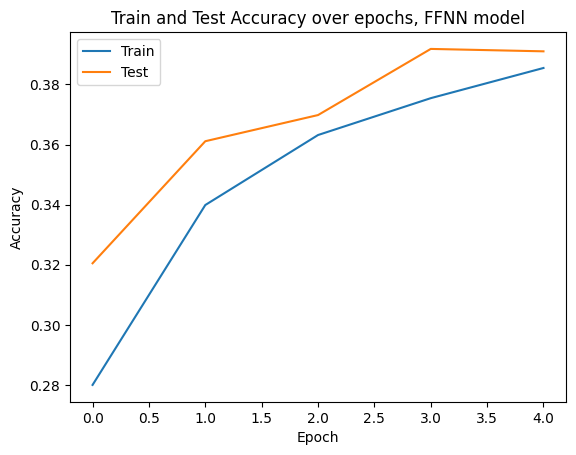

In [158]:
train_dataloader = torch.utils.data.DataLoader(train_set, batch_size=16, shuffle=True, collate_fn=collate_fn)
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size=16, shuffle=False, collate_fn=collate_fn)

# Num in_channels really shouldn't be above 1, the FFNN probably can't handle that well
num_in_channels = next(iter(train_dataloader))[0].shape[1]
in_width_height = next(iter(train_dataloader))[0].shape[-1]

FFNN_model = FFNN(in_features=num_in_channels*in_width_height**2,num_classes=10, lr=0.001)

train_epochs = 5
train_accs, test_accs = FFNN_model.train(train_dataloader, epochs=train_epochs, val_dataloader=test_dataloader)

# plot train and test accuracies
plt.plot(range(train_epochs), train_accs, label='Train')
plt.plot(range(train_epochs), test_accs, label='Test')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy over epochs, FFNN model')
plt.legend()
plt.show()

# TODO: ADD QUESTION: WHY IS TRAIN ACCURACY MUCH LOWER THAN TEST ACCURACY FOR THE FIRST EPOCH?




### Displaying the output of the convlutional layers

*Sometimes it is interesting to actually examine how the convolutions in the CNN actually look, to reason about what the model learns. We do this by using Torch's 'forward hooks' - functions that you can apply to layers, that will then be called after the layer performs a forward pass. This can be useful for a bunch of different things, including adding BatchNorm to your model... We just use it to capture the output of each layer*

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8980392..1.0].


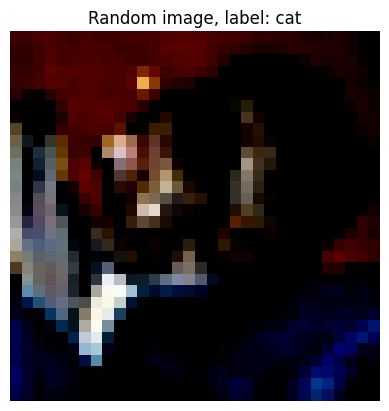

torch.Size([1, 3, 32, 32])
Layer: layers.0, Activation Shape: torch.Size([1, 32, 32, 32])
Layer: layers.3, Activation Shape: torch.Size([1, 64, 14, 14])


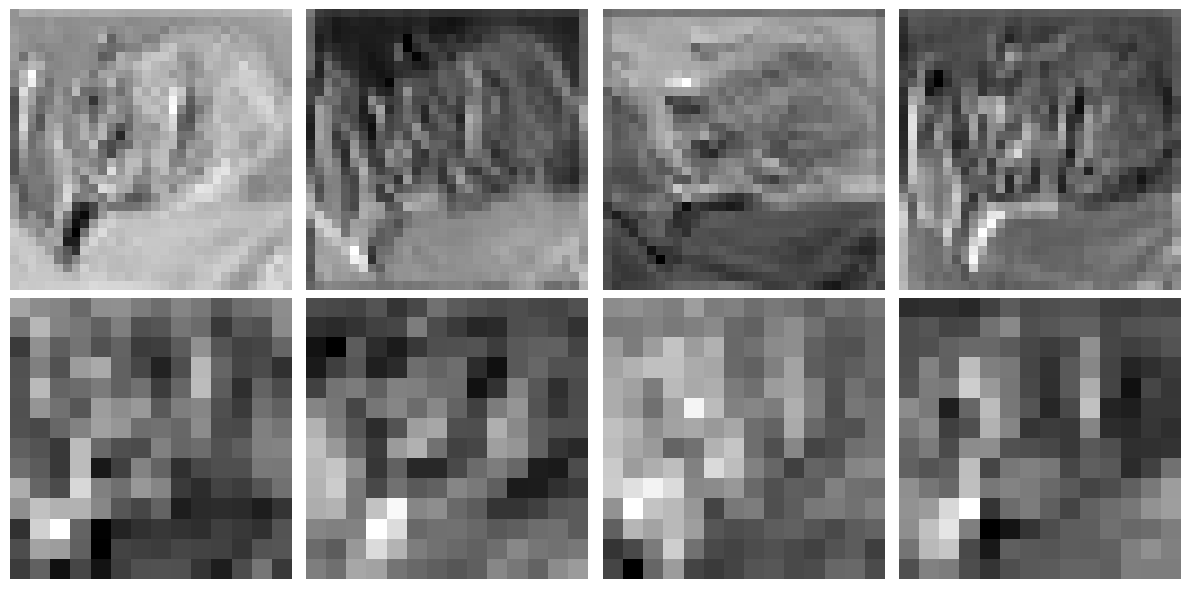

In [186]:
trained_model = False

if trained_model is False:
    # Initialize a dummy untrained CNN model to compare activations with
    in_channels = next(iter(train_dataloader))[0].shape[1]
    in_width_height = next(iter(train_dataloader))[0].shape[-1]
    feats_fore_linear = get_dim_before_first_linear(CNN_model.layers, in_width_height, in_channels, brain=False)
    model = CNN(num_classes=10, in_channels=in_channels, features_fore_linear=feats_fore_linear, lr=0.001) 

else:
    # Otherwise use a trained model
    model = CNN_model

# Dict to hold network activations
activations = {}

# Hook function, is a type of wrapper function that is then called whenever layer registered with it is run
def forward_hook(layer_name, capture_dict):
    def hook(module, input, output):
        capture_dict[layer_name] = output
    return hook

# Register hooks for all Conv2d layers model
for name, layer in model.named_modules():
    if isinstance(layer, nn.Conv2d):
        layer.register_forward_hook(forward_hook(name, activations))

# Get just a single example from the test dataloader
input_image, input_label = next(iter(test_dataloader))
input_image, input_label = input_image[0].unsqueeze(0).to('cpu'), input_label[0].unsqueeze(0).to('cpu').numpy()[0]

# TODO: ADD SUPPORT FOR CIFAR10
# Plot the image before convolutions
if dataset == 'mnist':
    plt.imshow(input_image.squeeze().numpy(), cmap='gray')
    plt.title(f'Random image, label: {input_label}')

elif dataset == 'cifar10':
    plt.imshow(input_image.squeeze().transpose(0, 2).transpose(0, 1).numpy())
    plt.title(f'Random image, label: {cifar10_classes[input_label]}')
plt.axis('off')  # Hide axis
plt.show()

# Forward pass - Use torch.no_grad() to not store gradients, since we are only interested in activations
with torch.no_grad():
    print(input_image.shape)
    output = model(input_image.to(device))

# Display the captured activations
for layer_name, activation in activations.items():
    print(f"Layer: {layer_name}, Activation Shape: {activation.shape}")

fig, axes = plt.subplots(2, 4, figsize=(12, 6))

for i, (layer_name, activation) in enumerate(activations.items()):
    for j in range(4):
        axes[i, j].imshow(activation[0, j, ...].to('cpu'), cmap='gray')
        axes[i, j].axis('off') 

plt.tight_layout()
plt.show()

In [ ]:
# Assuming that `model` is already defined as in your code
# and contains the layers you provided.

def visualize_kernel_output(model, image):

    image = image.unsqueeze(0)  # Add batch dimension: (1, 1, H, W)
    outputs = []

    for layer in model.layers:
        kernel_weights = layer.weight.detach().cpu()
        print(f"Kernel weights shape: {kernel_weights.shape}")

        with torch.no_grad():
            outputs.append(layer(image))
            


    # Get the first convolutional layer
    first_conv_layer = model.layers[0]  # First layer is Conv2d
    
    # Get the weights of the first kernel in the first conv layer
    first_kernel_weights = first_conv_layer.weight[0].detach().cpu()  # Shape: (out_channels, in_channels, kernel_size, kernel_size)
    
    print(f"First kernel weights shape: {first_kernel_weights.shape}")
    
    # Pass the image through the first convolutional layer
    with torch.no_grad():
        conv_output = first_conv_layer(image.unsqueeze(0))  # Add batch dimension: (1, 1, H, W)
        conv_output = conv_output.squeeze(0)  # Remove batch dimension: (32, H', W')

    # Visualize the output of the first channel (i.e., the result of the first kernel)
    first_kernel_output = conv_output[0].detach().cpu().numpy()  # Select the output corresponding to the first kernel
    
    plt.imshow(first_kernel_output, cmap='gray')
    plt.title("Output of first kernel after first convolution")
    plt.colorbar()
    plt.show()

# Assuming the image is a single image tensor with shape (1, H, W), e.g., from train_dataloader
# This assumes a grayscale image (1 channel), modify accordingly for RGB input

# Load one image from the train set
image, label = next(iter(train_dataloader))  # A batch from your dataloader
single_image = image[0].to(device)  # Use the first image in the batch and send it to the correct device

# Visualize the first kernel output
visualize_first_kernel_output(model, single_image)


In [ ]:
# Initialize dummy untrained CNN model to compare activations with
dummy_model = CNN(num_classes=10, in_channels=1, lr=0.001)

# Dicts to hold output of both dummy and trained network activations
dummy_activations = {}
trained_activations = {}

# Hook function, is a type of wrapper function that is then called whenever layer registered with it is run
def forward_hook(layer_name, capture_dict):
    def hook(module, input, output):
        capture_dict[layer_name] = output
    return hook

# Register hooks for all Conv2d layers for first dummy then good model
for name, layer in dummy_model.named_modules():
    if isinstance(layer, nn.Conv2d):
        layer.register_forward_hook(forward_hook(name, dummy_activations))

for name, layer in CNN_model.named_modules():
    if isinstance(layer, nn.Conv2d):
        layer.register_forward_hook(forward_hook(name, trained_activations))

# Get just a single example from the test dataloader
input_image, input_label = next(iter(test_dataloader))
input_image, input_label = input_image[0].unsqueeze(0).to('cpu'), input_label[0].unsqueeze(0).to('cpu').numpy()[0]

# Plot the image before convolutions
plt.imshow(input_image.squeeze().numpy(), cmap='gray')
plt.title(f'Random mnist_image, label: {input_label}')
plt.axis('off')  # Hide axis
plt.show()


# Forward pass - Use torch.no_grad() to not store gradients, since we are only interested in activations
with torch.no_grad():
    output_dummy = dummy_model(input_image.to(device))
    output_trained = CNN_model(input_image.to(device))


# Display the captured activations
for layer_name, activation in dummy_activations.items():
    print(f"Layer: {layer_name}, Activation Shape: {activation.shape}")

for layer_name, activation in trained_activations.items():
    print(f"Layer: {layer_name}, Activation Shape: {activation.shape}")


fig, axes = plt.subplots(2, 4, figsize=(12, 6))

for i, (layer_name, activation) in enumerate(dummy_activations.items()):
    for j in range(4):
        axes[i, j].imshow(activation[0, j, ...].to('cpu'), cmap='gray')
        axes[i, j].axis('off') 

for i, (layer_name, activation) in enumerate(trained_activations.items()):
    for j in range(4):
        axes[i, j].imshow(activation[0, j, ...].to('cpu'), cmap='gray')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:


    def forward_checker(self, x):
        print(x.size())

        for layer in self.layers:
            try:
                x = layer(x)
                print(f"After {layer}: ",x.size())
            except: #Do not use base exception!
                print("Oops, that did not work!", BaseException)
                break

class DiscountVGG:
    def __init__(self):
        pass

    def forward(self, x):
        pass

    def train():
        pass


class LightningVGG:
    pass



model = CNN(None, None, 64, 10, in_channels = 3, lr=0.001)

# summary(model, (3, 64, 64))

model.forward_checker(torch.zeros(16, 3, 64, 64))

        
#     def forward(self, x):
#         return self.layers(x)
# None, None
#         print(x.size())

#         for layer in self.layers:
#             try:
#                 x = layer(x)
#                 print(f"After {layer}: ",x.size())
#             except: #Do not use base exception!
#                 print("Oops, that did not work!", BaseException)
#                 break

# class DiscountVGG:
#     def __init__(self):
#         pass

#     def forward(self, x):
#         pass

#     def train():
#         pass


# class LightningVGG:
#     pass

In [31]:
# Pretty writer

# TODO:
# Make stdout catcher that works for ipynb (or at least has an option for it) and doesn't break stdout
# Make a prettifier function that runs another function with the stdout capturer, captures the output
# and then writes it using the prettifier code from gpt (formatting and all that) 

# Finally: Consider if you can't make prettywriter a wrapper rather than a context manager

from io import StringIO
import sys
from contextlib import contextmanager
@contextmanager
def capture_stdout():
    """
    context manager encapsulating a pattern for capturing stdout writes
    and restoring sys.stdout even upon exceptions

    Examples:
    >>> with capture_stdout() as get_value:
    >>>     print("here is a print")
    >>>     captured = get_value()
    >>> print('Gotcha: ' + captured)

    >>> with capture_stdout() as get_value:
    >>>     print("here is a print")
    >>>     raise Exception('oh no!')
    >>> print('Does printing still work?')
    """
    # Redirect sys.stdout
    out = StringIO()
    sys.stdout = out
    # Yield a method clients can use to obtain the value
    try:
        yield out.getvalue
    finally:
        # Restore the normal stdout
        sys.stdout = sys.__stdout__

class Capturing(list):
    def __enter__(self):
        self._stdout = sys.stdout
        sys.stdout = self._stringio = StringIO()
        return self
    def __exit__(self, *args):
        self.extend(self._stringio.getvalue().splitlines())
        del self._stringio    # free up some memory
        sys.stdout = self._stdout

def parrot(num=5):
    for i in range(num):
        print("NUMBER:", i)
    
with capture_stdout() as get_value:
    print('here is a print')
    parrot(10)
    captured = get_value()
print("GOTCHA", captured)

print("GOTCHA")


help_strings = [
    ("this is value 1", 42),
    ("this is a longer text for value 2", 3.14),
    ("another value", 100),
    ("short", 5)
]

# Find the maximum length of the help strings
max_length = max(len(help) for help, _ in help_strings)

# Print each help string with its value, aligned in columns
for help, value in help_strings:
    print(f"{help:<{max_length}} : {value}")



In [ ]:
class BaseNNClass(torch.nn.Module):
    def __init__(self, lr=0.001):
        if self.__class__ == BaseNNClass:
            raise TypeError(f"{self.__class__.__name__} cannot be instantiated directly.")
        super().__init__()

    def forward(self, x):
        # TODO: Consider if we have x.flatten here or in collate_fn
        return self.layers(x.flatten(start_dim=1))

    def train(self, train_dataloader, epochs=1, val_dataloader=None):
        
        for epoch in tqdm(range(epochs)):

            for inputs, targets in train_dataloader:
                
                logits = self.forward(inputs)

                loss = self.criterion(logits, targets)

                loss.backward()

                self.optim.step()

                self.optim.zero_grad()

            if val_dataloader is not None:
                acc = self.eval(val_dataloader)
                print(f"Epoch {epoch} validation accuracy: {acc}")

    def eval(self, test_dataloader):
        
        total_acc = 0

        for input_batch, label_batch in test_dataloader:
            # Get predictions
            logits = self(input_batch)

            # Remember, outs are probabilities (so there's 10 for each input)
            # The classification the network wants to assign, must therefore be the probability with the larget value
            # We find that using argmax (dim=1, because dim=0 would be across batch dimension)
            classifications = torch.argmax(logits, dim=1)
            total_acc += (classifications == label_batch).sum().item()

        total_acc = total_acc / len(test_dataloader.dataset)

        return total_acc



In [3]:
import sys
from ipykernel.iostream import OutStream
nb_stdout = sys.stdout
sys.stdout = nb_stdout
print("derp")
print(nb_stdout)



derp


In [11]:
example_input, example_label = next(iter(train_dataloader))

print("Batch size is:", len(example_input))
print("Input dim is (remember, there's also a color channel!):", example_input.shape[1:])

# TODO: Change both below to be not cancerous!
in_features = example_input.flatten(start_dim=1).shape[-1]
num_classes = 10 # 

model = FFN(None, None, in_features=in_features, num_classes=num_classes)

model.train(train_dataloader, epochs=1)


print(model.test(test_dataloader))

Batch size is: 16
Input dim is (remember, there's also a color channel!): torch.Size([1, 28, 28])


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:10<00:00, 10.47s/it]


0.098


In [ ]:

# num_rows = 4
# num_cols = 5
# num_images = num_rows * num_cols


# # Create a figure to display the images
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
# axes = axes.flatten()
# fig.suptitle('Train Images and their classes', fontsize=20)


# p = 0
# # TODO: Consider if it isn't easier just using variable dataloader size for this bullshit... would save the nested loops, ya'know
# for imgs, labels in train_dataloader:
#     for img, label in zip(imgs, labels):
        
#         if p == num_images:
#             continue

#         curr_img = img.permute(1, 2, 0).to('cpu').numpy()
#         # Normalize the image to the range [0, 1]
#         curr_img = (curr_img - curr_img.min()) / (curr_img.max() - curr_img.min())
#         axes[p].imshow(curr_img)
#         axes[p].axis('off')

#         if dataset == 'cifar10':
#             axes[p].set_title(cifar10_classes[label.item()], fontsize=12)
#         elif dataset == 'mnist':
#             axes[p].set_title(label.item(), fontsize=12)

#         p += 1

#     if p == num_images:
#         break

    
# plt.tight_layout()
# plt.show()

# BELOW STOLEN FROM 02456 - DO NOT USE, OBVIOUSLY REWRITE IT

#### <span style="color:red"> EXE 1.1 </span> Manual calculations

![](images/conv_exe.png)



1. Manually convolve the input, and compute the convolved features. No padding and no strieds.
1. Perform `2x2` max pooling on the convolved features. Stride of 2.

___

<span style="color:blue"> Answer: </span>






#### <span style="color:red"> EXE 1.2 </span> Reducing the resolution
One of the important features of convolutional networks are their ability to reduce the spatial resolution, while retaining the important features.
Effectively this gives a local translational invariance and reduces the computation. 
This is most often done with **maxpooling** or by using strides.

1. Using only convolutional layers and pooling operations reduce the feature map size to `1x1xF`.
    * The number of feature maps, `F`, is up to you.

___

<span style="color:blue"> Write down what you did: </span>

``` 
Paste your code here
```


``` 
Paste the trace of the tensors shape as it is propagated through the network here
```


#### <span style="color:red"> EXE 1.3 </span> Play around with the network.
The MNIST dataset is so easy to solve with convolutional networks that it isn't interesting to spend to much time on maximizing performance.
A more interesting question is *how few parameters can you solve it with?*

1. Try and minimize the number of parameters, while keeping validation accuracy about 95%. Try changing the

    * Number of layers
    * Number of filters
    * Kernel size
    * Pooling size
1. Once happy take note of the performance, number of parameters (printed automatically), and describe the network below.
___


<span style="color:blue"> Answer: </span>


#### <span style="color:red"> EXE 1.4 </span> Comparing dense and convolutional networks

1. Now create a densely connected network (the ones from lab 1), and see how good performance you can get with a similar number of parameters.
___

<span style="color:blue"> Describe your findings: </span>
